**Employee Salary Prediction Model:**

The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:


1.  **Age**
2.   **Gender**

1.   **Education Level**
2.   **Job Title**

1.   **Years of Experience**
2.  **Salary**







In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv('/content/Salary_Data.csv')

In [3]:
print("Column names:")
print(df.columns.tolist())
print("Number of rows:", df.shape[0])

Column names:
['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
Number of rows: 6704


In [4]:
print(df.head(10))

    Age  Gender Education Level              Job Title  Years of Experience  \
0  32.0    Male      Bachelor's      Software Engineer                  5.0   
1  28.0  Female        Master's           Data Analyst                  3.0   
2  45.0    Male             PhD         Senior Manager                 15.0   
3  36.0  Female      Bachelor's        Sales Associate                  7.0   
4  52.0    Male        Master's               Director                 20.0   
5  29.0    Male      Bachelor's      Marketing Analyst                  2.0   
6  42.0  Female        Master's        Product Manager                 12.0   
7  31.0    Male      Bachelor's          Sales Manager                  4.0   
8  26.0  Female      Bachelor's  Marketing Coordinator                  1.0   
9  38.0    Male             PhD       Senior Scientist                 10.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
5   55000.0  
6  120000.0  
7   80000.0  
8   

In [5]:
print(df)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [7]:
print(df.describe())

               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [8]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [10]:
print(df.isnull().sum())

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


In [11]:
for column in df.select_dtypes(include='object').columns:
    mode_value = df[column].mode()
    if not mode_value.empty:
        df[column].fillna(mode_value[0], inplace=True)

In [12]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [13]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,520
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Social Media Specialist,1
Senior Software Architect,1
Developer,1


In [14]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2270
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [15]:
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's,3026
Master's,1861
PhD,1369
High School,448


In [16]:
print(df['Gender'].value_counts())

Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64


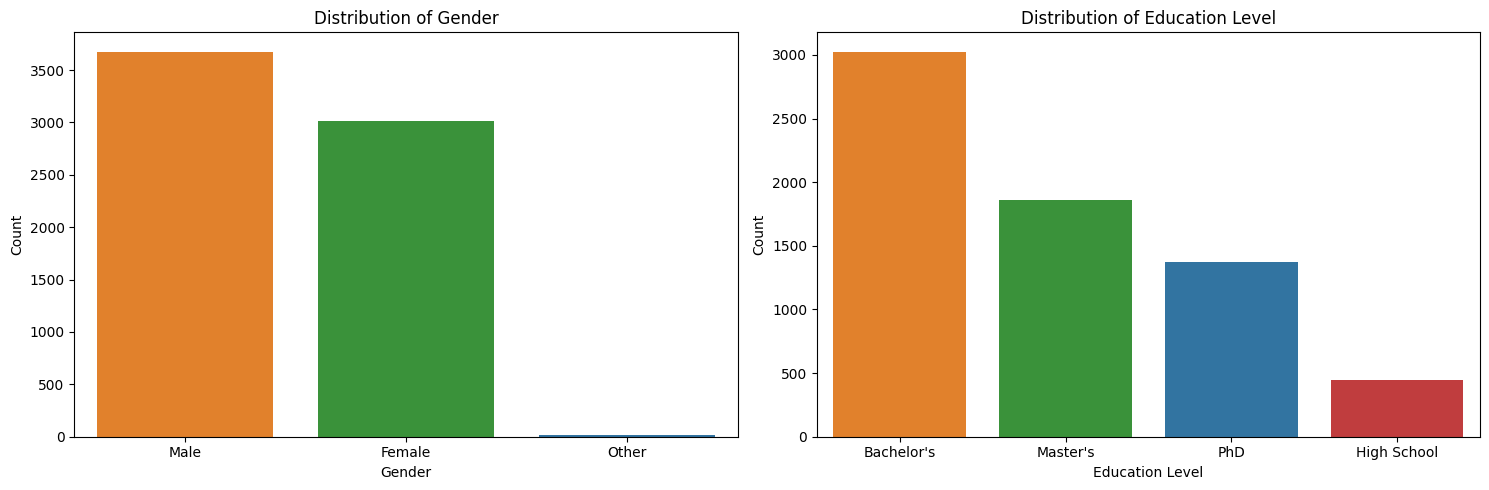

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define custom color palette in the desired order: Orange, Green, Blue, Red
custom_palette = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728']

# Apply palette to both plots
sns.countplot(x='Gender', data=df, ax=ax[0], palette=custom_palette)
sns.countplot(x='Education Level', data=df, ax=ax[1], palette=custom_palette)

# Add labels and titles
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**

**Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.

**Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.

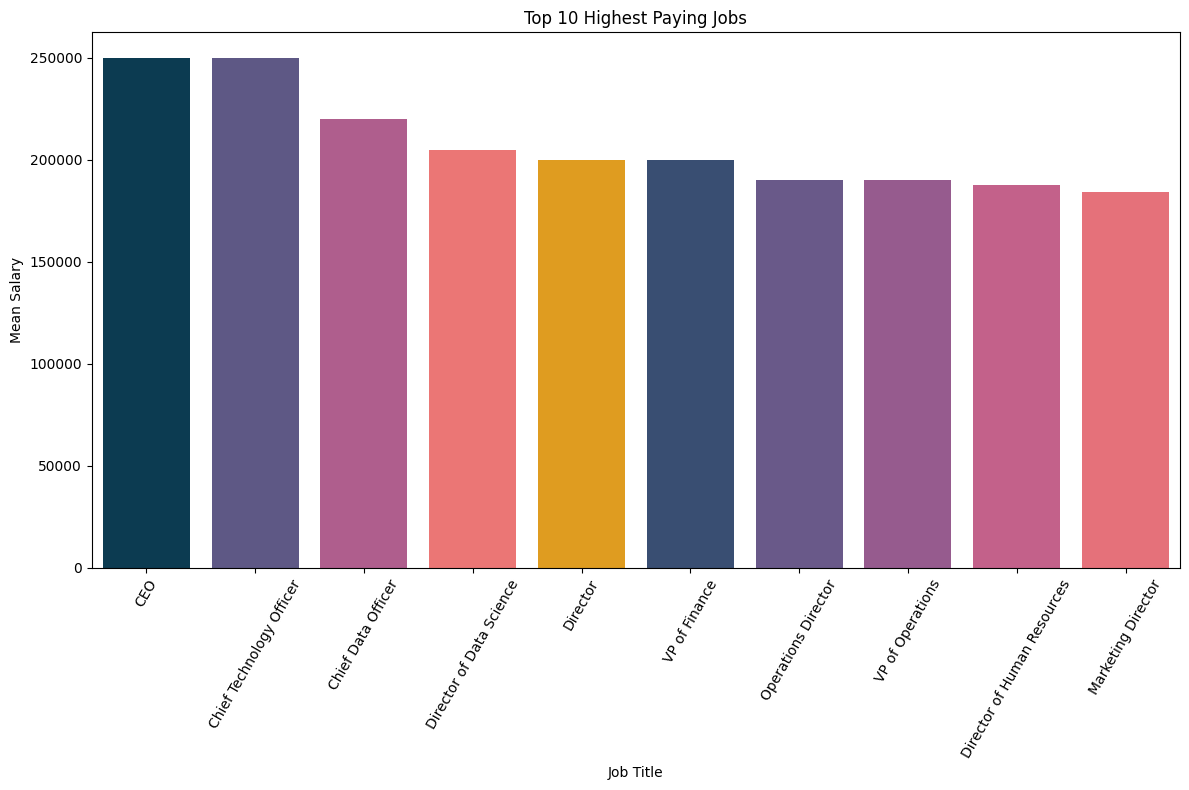

In [18]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Define a new set of dark colors
dark_colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600',
               '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a']

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index,
            y=top_10_highest_paying_jobs.values,
            palette=dark_colors)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

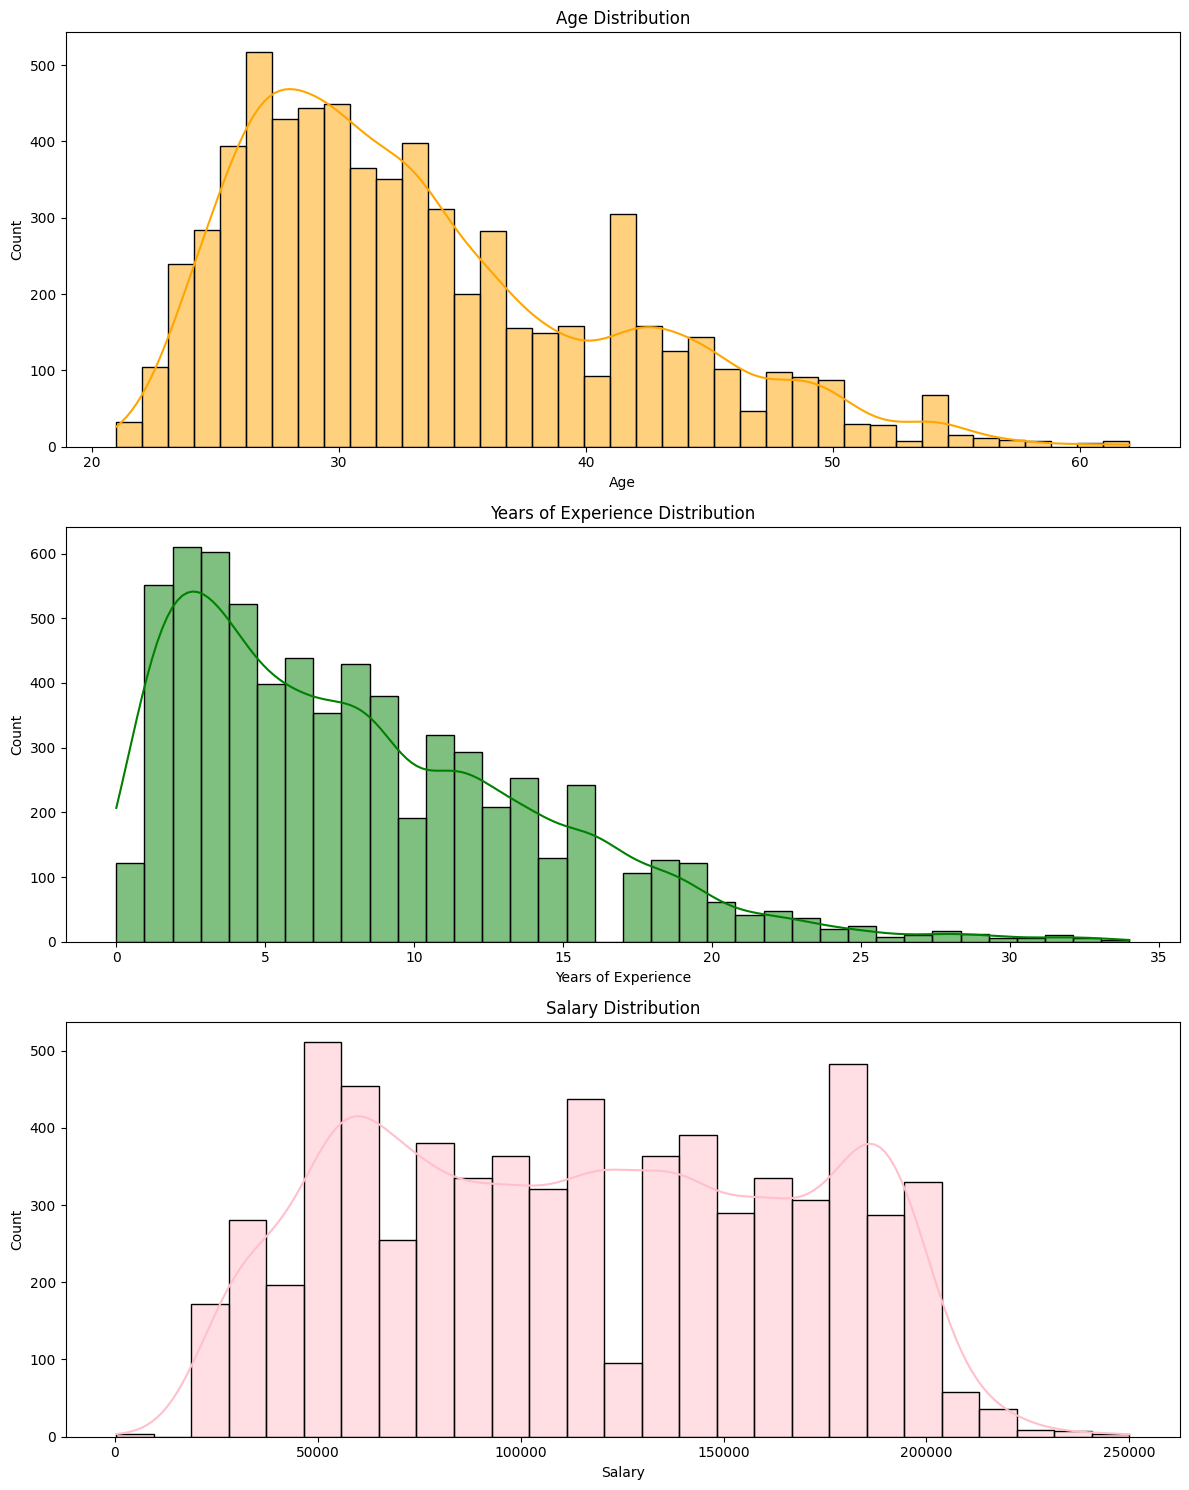

In [19]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='orange', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='green', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='pink', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of continuous variables**

**Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.

**Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts

**Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.

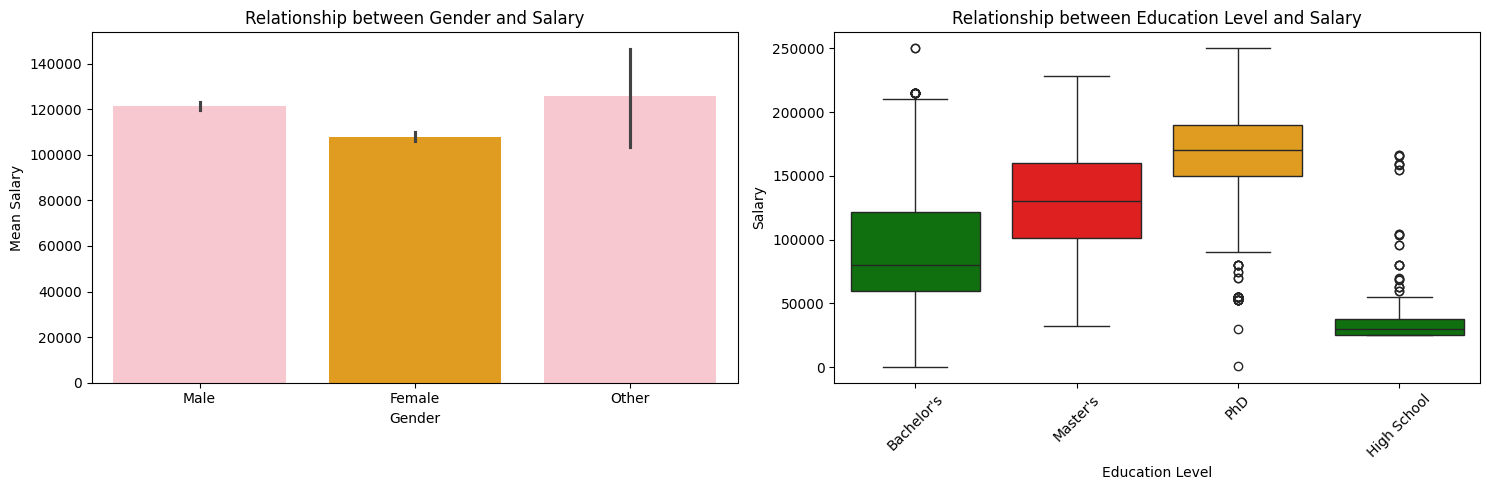

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot: Gender vs Salary (using green and red)
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0], palette=['pink', 'orange'])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Box plot: Education Level vs Salary (using green, red, orange)
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1],
            palette=['green', 'red', 'orange'])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Relationship between discreet variables**

1.   **Gender and Salary:** Other genders earn more than men and women. Women earn the least out of all three genders.
2.   **Education Level and Salary:** The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.



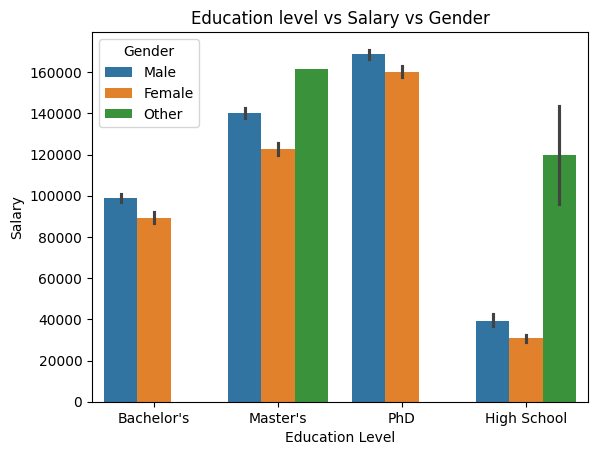

In [21]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

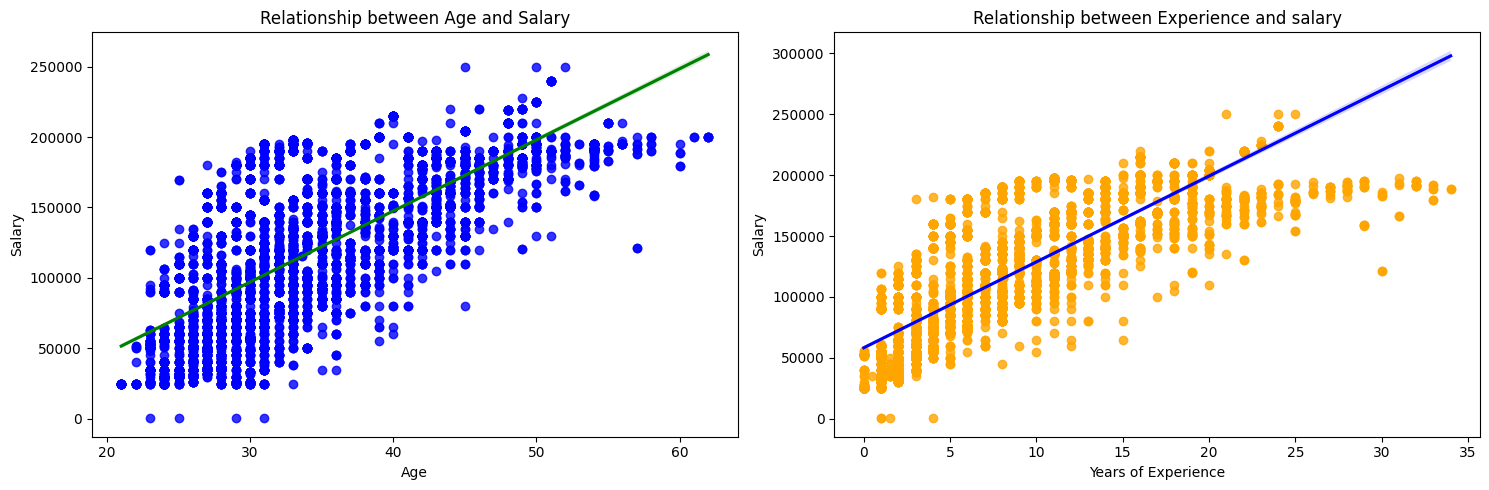

In [22]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'blue'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()



1.   **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger employees.
2.   **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.



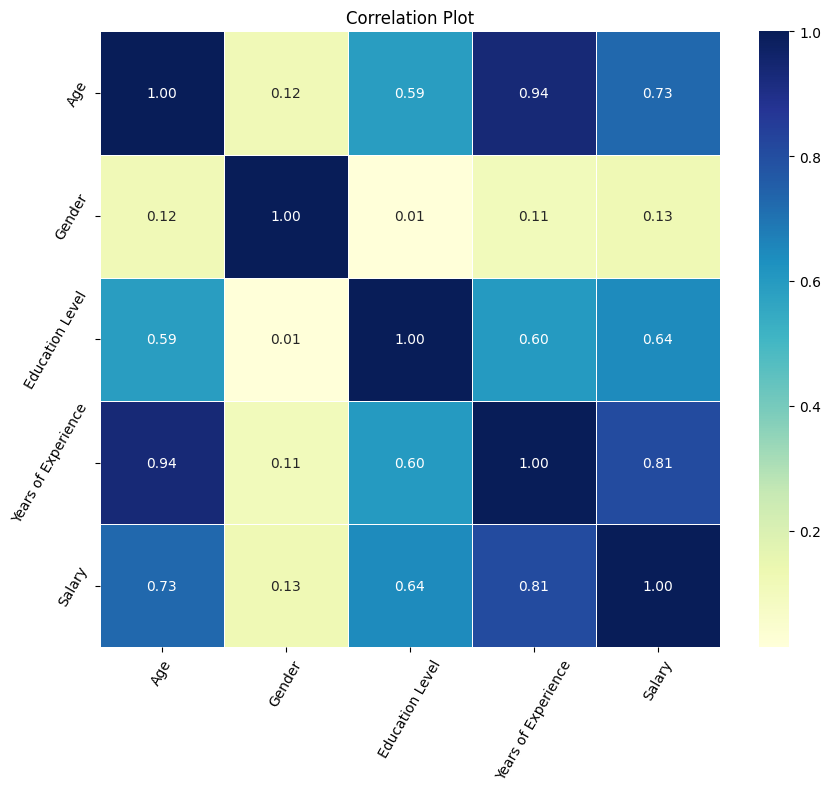

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Mapping Education Level
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)

# Label Encoding Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Drop Job Title for numeric correlation
df_numeric = df.drop('Job Title', axis=1)

# Plot correlation heatmap with a light colormap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()


**Heatmap**

The heatmap reveals the degree of correlation between the variables

Highest correlation between age and years of experience
High correlation between salary and years of experience
High correlation between salary and age
Moderately high correlation between salary and education level
Low correlation between gender and all variables

**Predicting Salary**

3 Models will be used to predict the salary

Linear Regression
Deision Tree
Random Forest

In [24]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [25]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [26]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q1**

**Preparing the data for ML analysis by converting categorical job titles into a numerical format**

In [27]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Accountant,Administrative Assistant,Back end Developer,Business Analyst,Business Development Manager,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,32.0,1,1,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,0,2,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,1,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# --- Step 1: Check and handle missing values ---
# Fill missing numeric values with column mean
features = features.fillna(features.mean(numeric_only=True))

# Just in case, confirm no missing values now
print("Missing in features:", features.isnull().sum().sum())  # Should be 0
print("Missing in target:", target.isnull().sum())  # Should be 0

# --- Step 2: Split the data into training and testing ---
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# --- Step 3: Define models and hyperparameters ---
model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [10, 20, 30, 50, 80],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    }
}

# --- Step 4: Grid Search with Cross-Validation ---
score = []

for model_name, m in model_params.items():
    clf = GridSearchCV(
        estimator=m['model'],
        param_grid=m['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    clf.fit(x_train, y_train)

    score.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'MSE (Negative)': clf.best_score_
    })

# --- Step 5: Display results ---
results_df = pd.DataFrame(score)
print("\nModel Performance:")
print(results_df)


Missing in features: 0
Missing in target: 0

Model Performance:
              Model                                        Best Params  \
0  LinearRegression                                                 {}   
1             Ridge                                     {'alpha': 0.1}   
2     Random_Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   

   MSE (Negative)  
0   -4.654051e+08  
1   -4.653305e+08  
2   -7.047242e+07  


In [94]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Initialize list to store model results
score = []

# Loop through each model and its parameters
for model_name, m in model_params.items():
    clf = GridSearchCV(
        estimator=m['model'],
        param_grid=m['params'],
        cv=5,
        scoring='neg_mean_squared_error'
    )

    # Fit the model on training data
    clf.fit(x_train, y_train)

    # Append results
    score.append({
        'Model': model_name,
        'Params': clf.best_params_,
        'MSE(-ve)': clf.best_score_
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(score)
print(results_df)


              Model                                             Params  \
0  LinearRegression                                                 {}   
1             Ridge                                     {'alpha': 0.1}   
2     Random_Forest  {'max_depth': None, 'min_samples_split': 2, 'n...   

       MSE(-ve)  
0 -4.654051e+08  
1 -4.653305e+08  
2 -7.047242e+07  


In [95]:
# Order of the best models

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort


,Model,Params,MSE(-ve)
2,Random_Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",-7.047242e+07
1,Ridge,{'alpha': 0.1},-4.653305e+08
0,LinearRegression,{},-4.654051e+08


In [104]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [105]:
y_pred_rfr = rfr.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rfr)

# Print results
print("🔍 Random Forest Regressor Evaluation Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

🔍 Random Forest Regressor Evaluation Metrics
Mean Squared Error (MSE): 77760514.3204
Mean Absolute Error (MAE): 3446.5917
Root Mean Squared Error (RMSE): 8818.1922
R² Score: 0.9711


In [98]:

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [99]:
y_pred_dtr = dtr.predict(x_test)
mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dtr)

# Print the evaluation results
print("📊 Decision Tree Regressor Evaluation Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Decision Tree Regressor Evaluation Metrics
Mean Squared Error (MSE): 170148373.2002
Mean Absolute Error (MAE): 7407.3430
Root Mean Squared Error (RMSE): 13044.0934
R² Score: 0.9368


In [100]:
# Linear regression model

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred_lr = lr.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation results
print("📊 Linear Regression Evaluation Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Linear Regression Evaluation Metrics
Mean Squared Error (MSE): 445865761.6113
Mean Absolute Error (MAE): 15249.2570
Root Mean Squared Error (RMSE): 21115.5337
R² Score: 0.8344


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=0)
}

# Dictionary to store R² scores
r2_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"📊 R² Score for {name}: {r2:.4f}")

# Determine the best model
best_model_name = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model_name]
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, "best_model.pkl")

# Print the result
print(f"\n✅ Best Model: {best_model_name} with R² Score = {best_r2:.4f}")
print("🎯 Best model saved as 'best_model.pkl'")


📊 R² Score for LinearRegression: 0.8344
📊 R² Score for DecisionTree: 0.9368
📊 R² Score for RandomForest: 0.9711

✅ Best Model: RandomForest with R² Score = 0.9711
🎯 Best model saved as 'best_model.pkl'


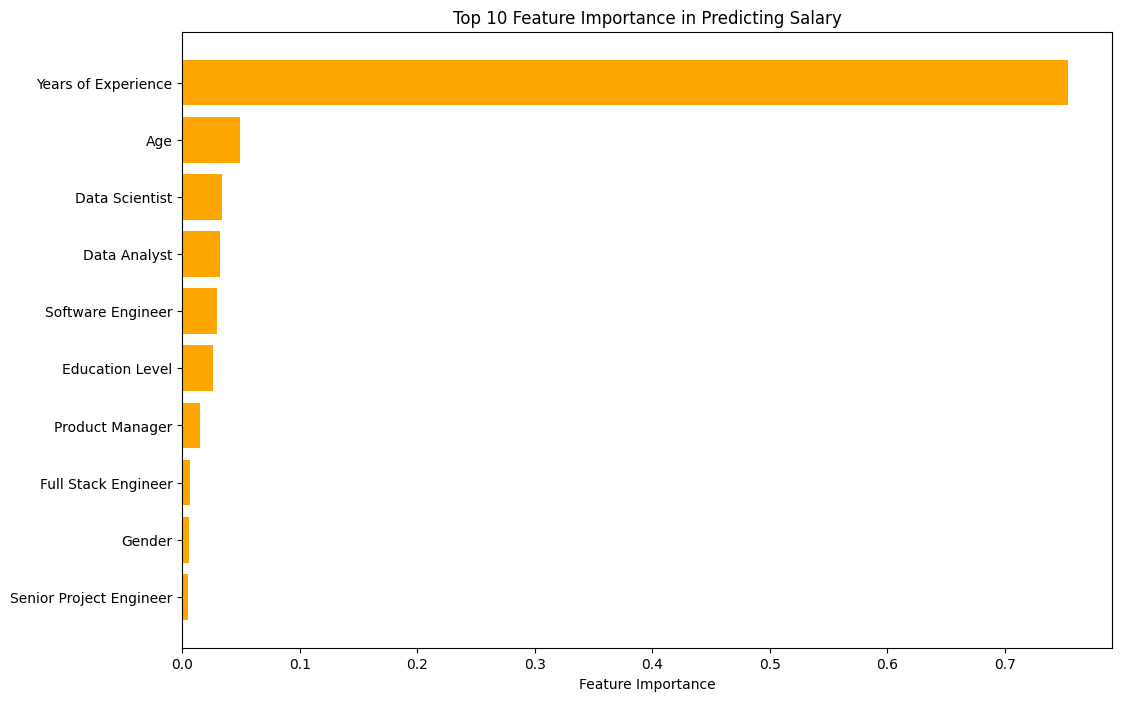

In [107]:
# Access the feature importances of Random Forest Regressor
feature_importances = rfr.feature_importances_

# Get feature names
feature_names = list(x_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10], color='orange')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Predicting Salary')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


**A bar chart depicting the importance of different features in predicting salary.**

***Conclusion***


1.   **The Random Forest model achieved the highest R-squared score (0.971) and the lowest MSE, MAE, and RMSE values, indicating the best predictive performance among the three models.**
2.   **The Decision Tree model performed well with an R-squared score of 0.936 but had higher errors compared to the Random Forest.**

1.   **The Linear Regression model had the lowest R-squared score (0.834) and the highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.**

In conclusion, the Random Forest model proves to be the most suitable for predicting salaries in this dataset. It demonstrates the highest predictive accuracy and consistently achieves the lowest error metrics (MSE, MAE, and RMSE) among all evaluated models. With its ability to capture complex patterns and interactions in the data, Random Forest outperforms both Decision Tree and Linear Regression models.

In [143]:
!pip install streamlit pyngrok --quiet

In [144]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

st.set_page_config(layout="wide")
st.title("💼 Salary Prediction using Machine Learning")

uploaded_file = st.file_uploader("Upload your salary dataset CSV file", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)
    st.subheader("Preview of Dataset")
    st.dataframe(df.head())

    if 'Salary' not in df.columns:
        st.error("The dataset must contain a 'Salary' column.")
    else:
        df = df.dropna()

        if 'Job Title' in df.columns:
            dummies = pd.get_dummies(df['Job Title'], drop_first=True)
            df = pd.concat([df.drop('Job Title', axis=1), dummies], axis=1)

        X = df.drop('Salary', axis=1)
        y = df['Salary']

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        model_choice = st.selectbox("Select a Model", ['Linear Regression', 'Ridge', 'Random Forest'])

        model_params = {
            'Linear Regression': {
                'model': LinearRegression(),
                'params': {}
            },
            'Ridge': {
                'model': Ridge(),
                'params': {'alpha': [0.1, 1, 10]}
            },
            'Random Forest': {
                'model': RandomForestRegressor(random_state=42),
                'params': {
                    'n_estimators': [50, 100],
                    'max_depth': [None, 5, 10],
                    'min_samples_split': [2, 5]
                }
            }
        }

        if st.button("Train and Evaluate"):
            selected = model_params[model_choice]
            clf = GridSearchCV(selected['model'], selected['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
            clf.fit(x_train, y_train)

            best_model = clf.best_estimator_
            y_pred = best_model.predict(x_test)

            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            st.subheader("📊 Evaluation Metrics")
            st.write(f"**Mean Squared Error (MSE):** {mse:.2f}")
            st.write(f"**Mean Absolute Error (MAE):** {mae:.2f}")
            st.write(f"**Root Mean Squared Error (RMSE):** {rmse:.2f}")
            st.write(f"**Best Parameters:** {clf.best_params_}")

            if model_choice == 'Random Forest':
                st.subheader("📌 Feature Importance")
                importances = best_model.feature_importances_
                indices = np.argsort(importances)[::-1]
                top_features = X.columns[indices][:10]
                top_importances = importances[indices][:10]

                fig, ax = plt.subplots()
                ax.barh(top_features[::-1], top_importances[::-1], color='orange')
                ax.set_xlabel("Importance")
                ax.set_title("Top 10 Feature Importances")
                st.pyplot(fig)


Overwriting app.py


In [145]:
!ngrok config add-authtoken 2tzWWra0wkxLzoNrj8YNXtlk1jK_6W8EV68Er8aT2Xzn2XG3Z

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [146]:
import joblib

joblib.dump(rfr, 'model.pkl')  # assuming 'rfr' is your trained RandomForestRegressor


['model.pkl']

In [147]:
!killall ngrok


In [148]:
joblib.dump(x_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']

In [149]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and column names
model = joblib.load("model.pkl")
model_columns = joblib.load("model_columns.pkl")

# App title
st.title("Salary Prediction App")

# User inputs
age = st.number_input("Age", min_value=18, max_value=70, value=30)
experience = st.number_input("Years of Experience", min_value=0, max_value=50, value=5)
gender = st.selectbox("Gender", ["Male", "Female", "Other"])
education = st.selectbox("Education Level", ["Bachelor's", "Master's", "PhD"])
job_title = st.selectbox("Job Title", [
    'Accountant', 'Administrative Assistant', 'Back end Developer',
    'Business Analyst', 'Business Development Manager',
    'Data Analyst', 'Data Engineer', 'Data Scientist',
    'Database Administrator', 'Front end Developer', 'Full Stack Developer',
    'HR Manager', 'IT Support', 'ML Engineer', 'Marketing Analyst',
    'Network Engineer', 'Project Manager', 'Sales Associate',
    'Software Developer', 'Software Engineer', 'System Administrator',
    'Senior Manager', 'Director', 'Marketing Coordinator',
    'Sales Manager', 'Senior Scientist', 'Financial Analyst',
    'Customer Service Rep', 'Operations Manager', 'Marketing Manager',
    'Senior Engineer', 'Data Entry Clerk', 'Sales Director',
    'VP of Operations', 'Recruiter', 'Product Manager'
])

# One-hot encode input
input_data = {
    'Age': age,
    'Years of Experience': experience,
    **{col: 0 for col in model_columns if col not in ['Age', 'Years of Experience']}
}

# Set selected features to 1
if f'Gender_{gender}' in input_data:
    input_data[f'Gender_{gender}'] = 1
if f"Education Level_{education}" in input_data:
    input_data[f"Education Level_{education}"] = 1
if f"Job Title_{job_title}" in input_data:
    input_data[f"Job Title_{job_title}"] = 1

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Reorder columns to match model
input_df = input_df.reindex(columns=model_columns, fill_value=0)

# Predict
if st.button("Predict Salary"):
    salary = model.predict(input_df)[0]
    st.success(f"Predicted Salary: ₹{salary:,.2f}")


Overwriting app.py


In [150]:
!streamlit run app.py &> logs.txt &
public_url = ngrok.connect(8501)
print(f"🚀 Streamlit app is live: {public_url}")

🚀 Streamlit app is live: NgrokTunnel: "https://d39c0a4a09a6.ngrok-free.app" -> "http://localhost:8501"
